In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Generator import generate_synthetic_image
from Models import KeypointDataset, extract_keypoints_from_target

import matplotlib.pyplot as plt
import numpy as np

import random

# Test all shape types
shape_types = ["triangle", "quadrilateral", "star", "checkerboard", "cube", "multiple"]

TEST 1: RGB Image Generation
----------------------------------------------------------------------
✓ triangle: shape=(256, 256, 3), dtype=uint8, keypoints=3
✓ quadrilateral: shape=(256, 256, 3), dtype=uint8, keypoints=4
✓ star: shape=(256, 256, 3), dtype=uint8, keypoints=6
✓ checkerboard: shape=(256, 256, 3), dtype=uint8, keypoints=20
✓ cube: shape=(256, 256, 3), dtype=uint8, keypoints=7
✓ multiple: shape=(256, 256, 3), dtype=uint8, keypoints=12


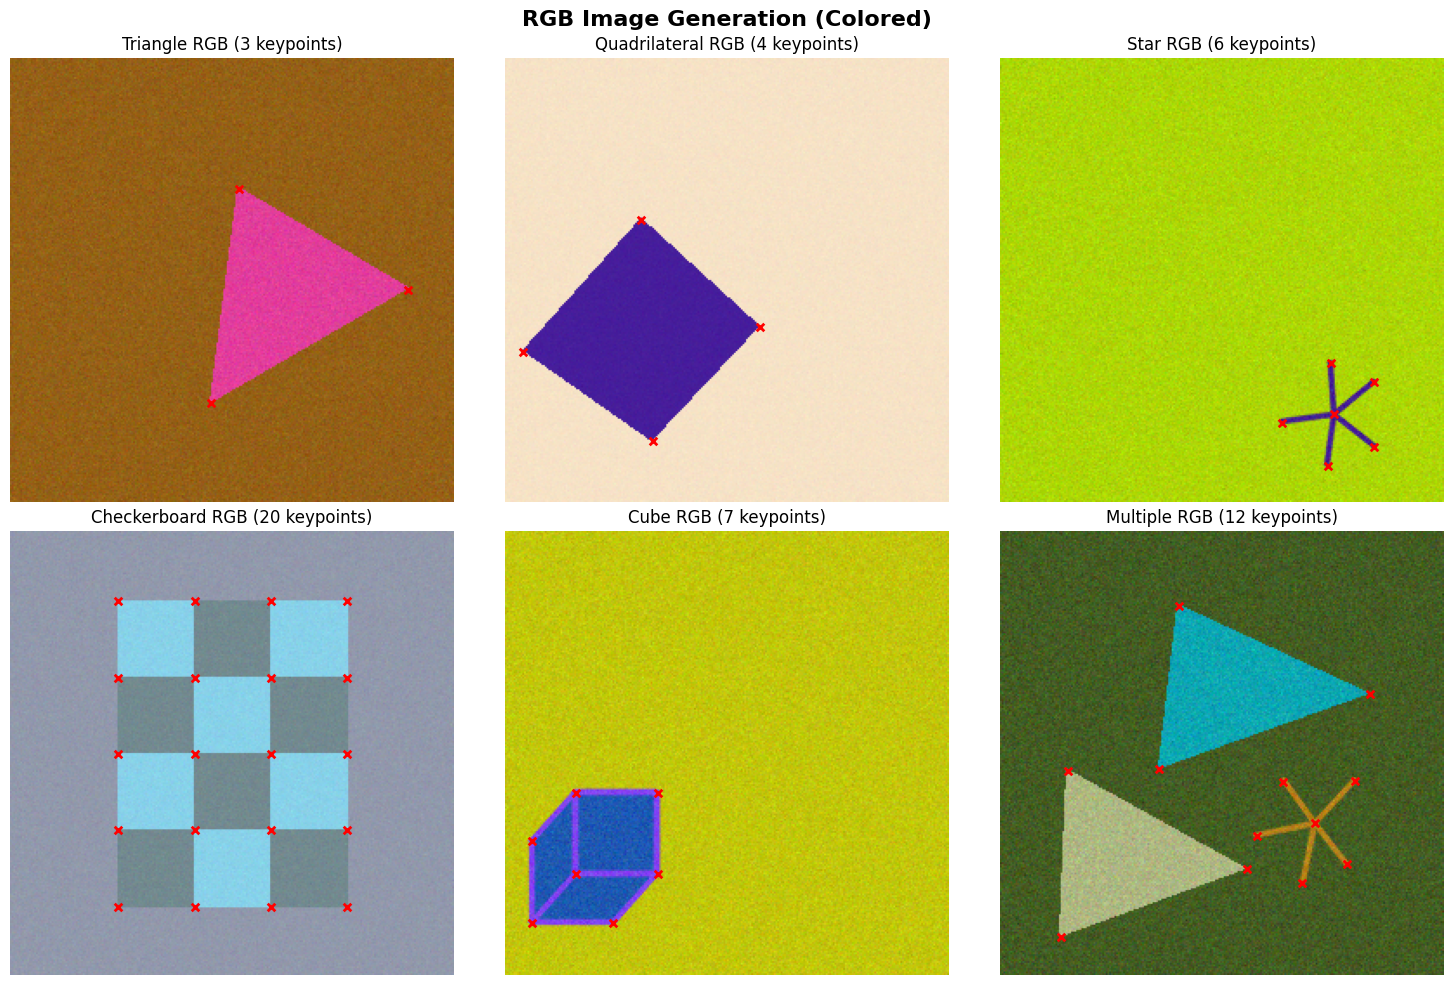

In [2]:
# ============================================================
# TEST 1: RGB Generation (for visualization/testing)
# ============================================================
print("TEST 1: RGB Image Generation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=False,
        grayscale=False  # RGB mode
    )

    axes[i].imshow(img)  # RGB image - no cmap needed
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} RGB ({len(keypoints)} keypoints)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: shape={img.shape}, dtype={img.dtype}, keypoints={len(keypoints)}")

plt.suptitle("RGB Image Generation (Colored)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print()

TEST 2: Grayscale Image Generation
----------------------------------------------------------------------
✓ triangle: shape=(256, 256), dtype=uint8, keypoints=3
✓ quadrilateral: shape=(256, 256), dtype=uint8, keypoints=4
✓ star: shape=(256, 256), dtype=uint8, keypoints=5
✓ checkerboard: shape=(256, 256), dtype=uint8, keypoints=20
✓ cube: shape=(256, 256), dtype=uint8, keypoints=7
✓ multiple: shape=(256, 256), dtype=uint8, keypoints=14


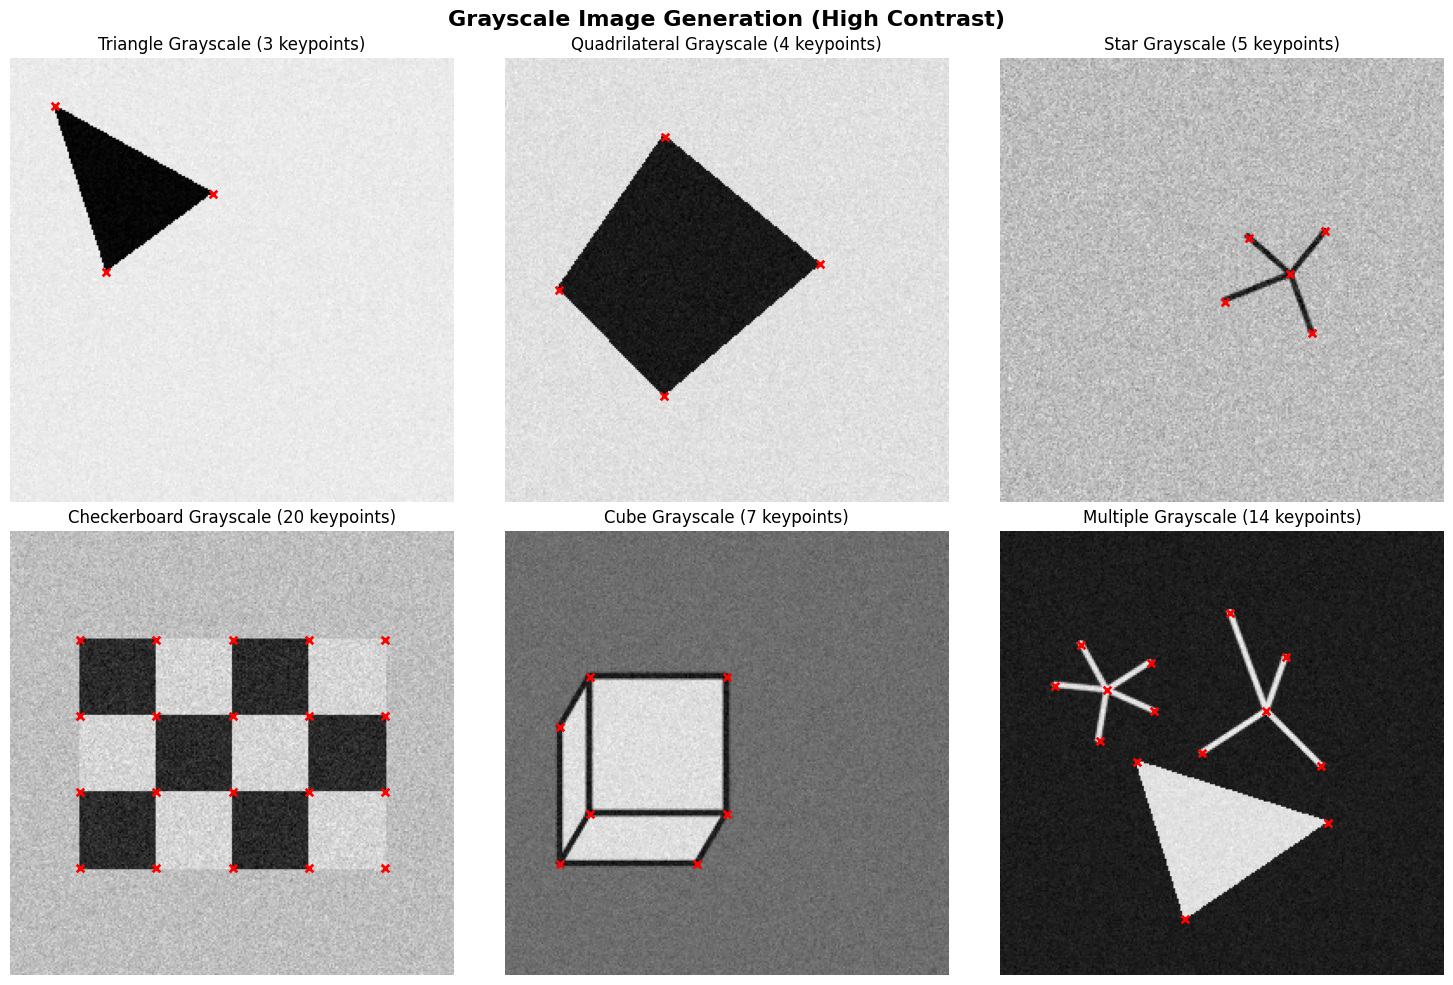

In [3]:
# ============================================================
# TEST 2: Grayscale Generation (for training dataset)
# ============================================================
print("TEST 2: Grayscale Image Generation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=False,
        grayscale=True  # Grayscale mode
    )

    axes[i].imshow(img, cmap='gray')  # Grayscale - use gray colormap
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} Grayscale ({len(keypoints)} keypoints)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: shape={img.shape}, dtype={img.dtype}, keypoints={len(keypoints)}")

plt.suptitle("Grayscale Image Generation (High Contrast)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print()

TEST 4: Grayscale with Homography Augmentation
----------------------------------------------------------------------
✓ triangle: keypoints after homography=1
✓ quadrilateral: keypoints after homography=2
✓ star: keypoints after homography=1
✓ checkerboard: keypoints after homography=16
✓ cube: keypoints after homography=3
✓ multiple: keypoints after homography=6


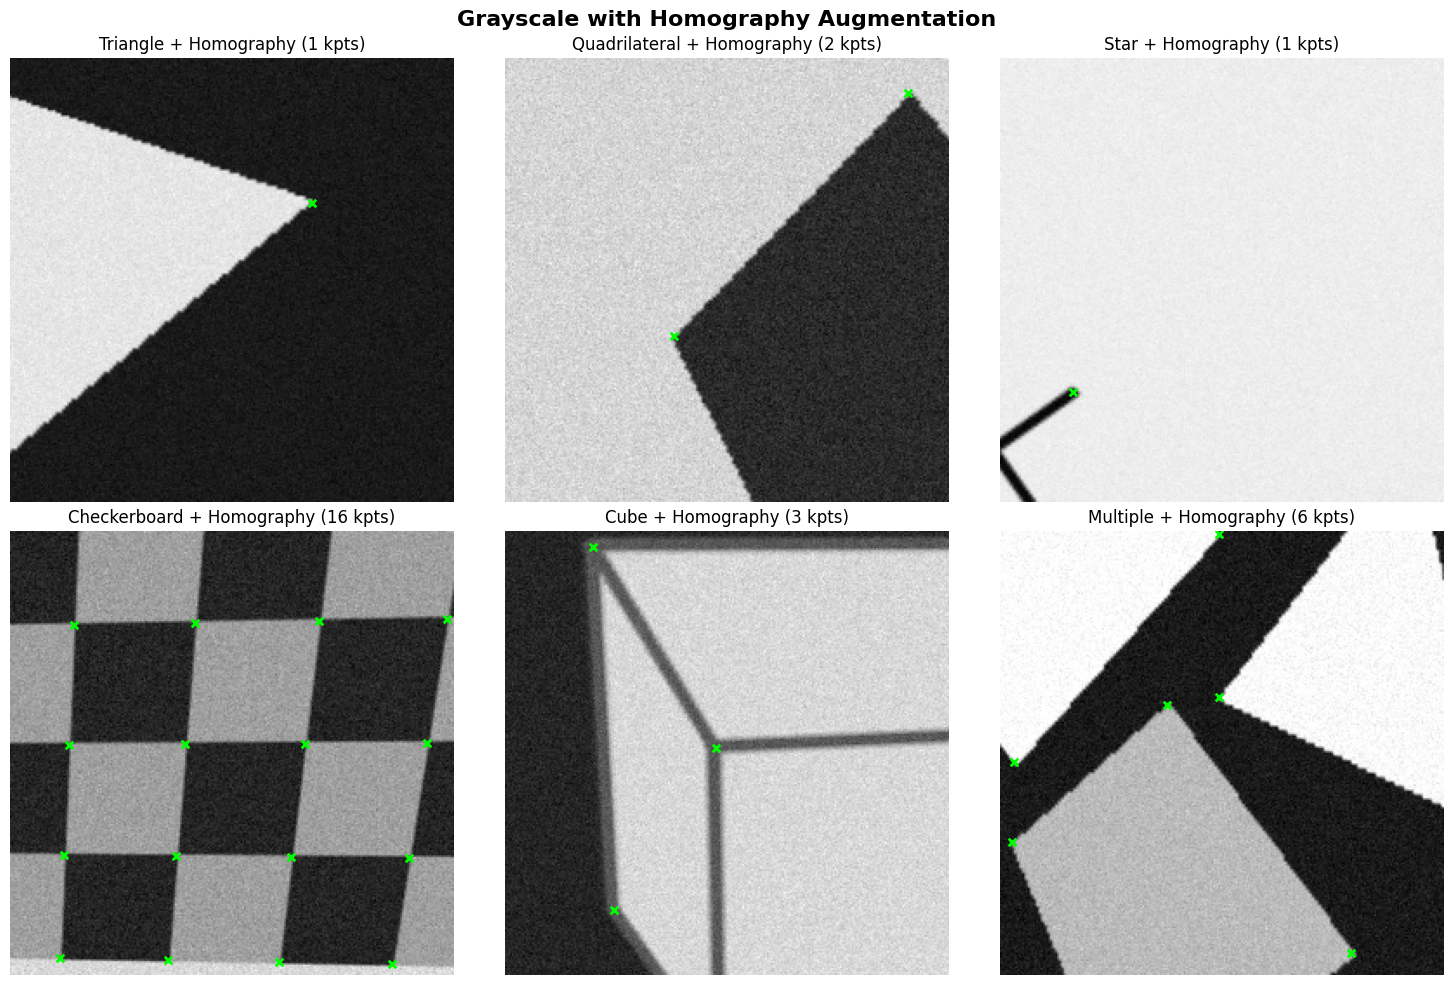

In [4]:
# ============================================================
# TEST 4: With Homography
# ============================================================
print("TEST 4: Grayscale with Homography Augmentation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=True,  # Apply homography
        grayscale=True
    )

    axes[i].imshow(img, cmap='gray')
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='lime', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} + Homography ({len(keypoints)} kpts)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: keypoints after homography={len(keypoints)}")

plt.suptitle("Grayscale with Homography Augmentation", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [5]:
# Generate and save dataset
print("Generating dataset with raw samples...")
dataset_generator = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    generate_fn=generate_synthetic_image,
    generate_kwargs={'width': 256, 'height': 256, 'shape_type': 'random', 'grayscale': True},
    use_homography_augment=False,
    use_photometric_augment=False,
    use_geometric_augment=False,
    pregenerate=True
)

# Save to file
dataset_generator.save_to_file('pregenerated_samples.npz')
print("Dataset saved!")

Generating dataset with raw samples...
Pre-generating 100 base samples...
  100/100 samples
✓ Pre-generation complete!
✓ Saved 100 samples to pregenerated_samples.npz
Dataset saved!


In [6]:
# Load dataset from file with different augmentation settings
print("Loading dataset without augmentation (raw samples)...")
dataset_raw = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=False,
    use_photometric_augment=False,
    use_geometric_augment=False,
    pregenerate=False,
    load_from_file='pregenerated_samples.npz'
)

print("\nLoading dataset with augmentation (from same file)...")
dataset_augmented = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=True,
    use_photometric_augment=True,
    use_geometric_augment=True,
    pregenerate=False,
    load_from_file='pregenerated_samples.npz'
)

print("\nLoading dataset with fresh random generation + augmentation...")
dataset_fresh = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=True,
    use_photometric_augment=True,
    use_geometric_augment=True,
    pregenerate=False,
    generate_fn=generate_synthetic_image,
    generate_kwargs={
        'width': 256,
        'height': 256,
        'shape_type': 'random',
        'grayscale': True,
    }
)

print("\nAll datasets loaded!")

Loading dataset without augmentation (raw samples)...
Loading 100 samples from pregenerated_samples.npz...
✓ Loaded 100 samples!

Loading dataset with augmentation (from same file)...
Loading 100 samples from pregenerated_samples.npz...
✓ Loaded 100 samples!

Loading dataset with fresh random generation + augmentation...

All datasets loaded!


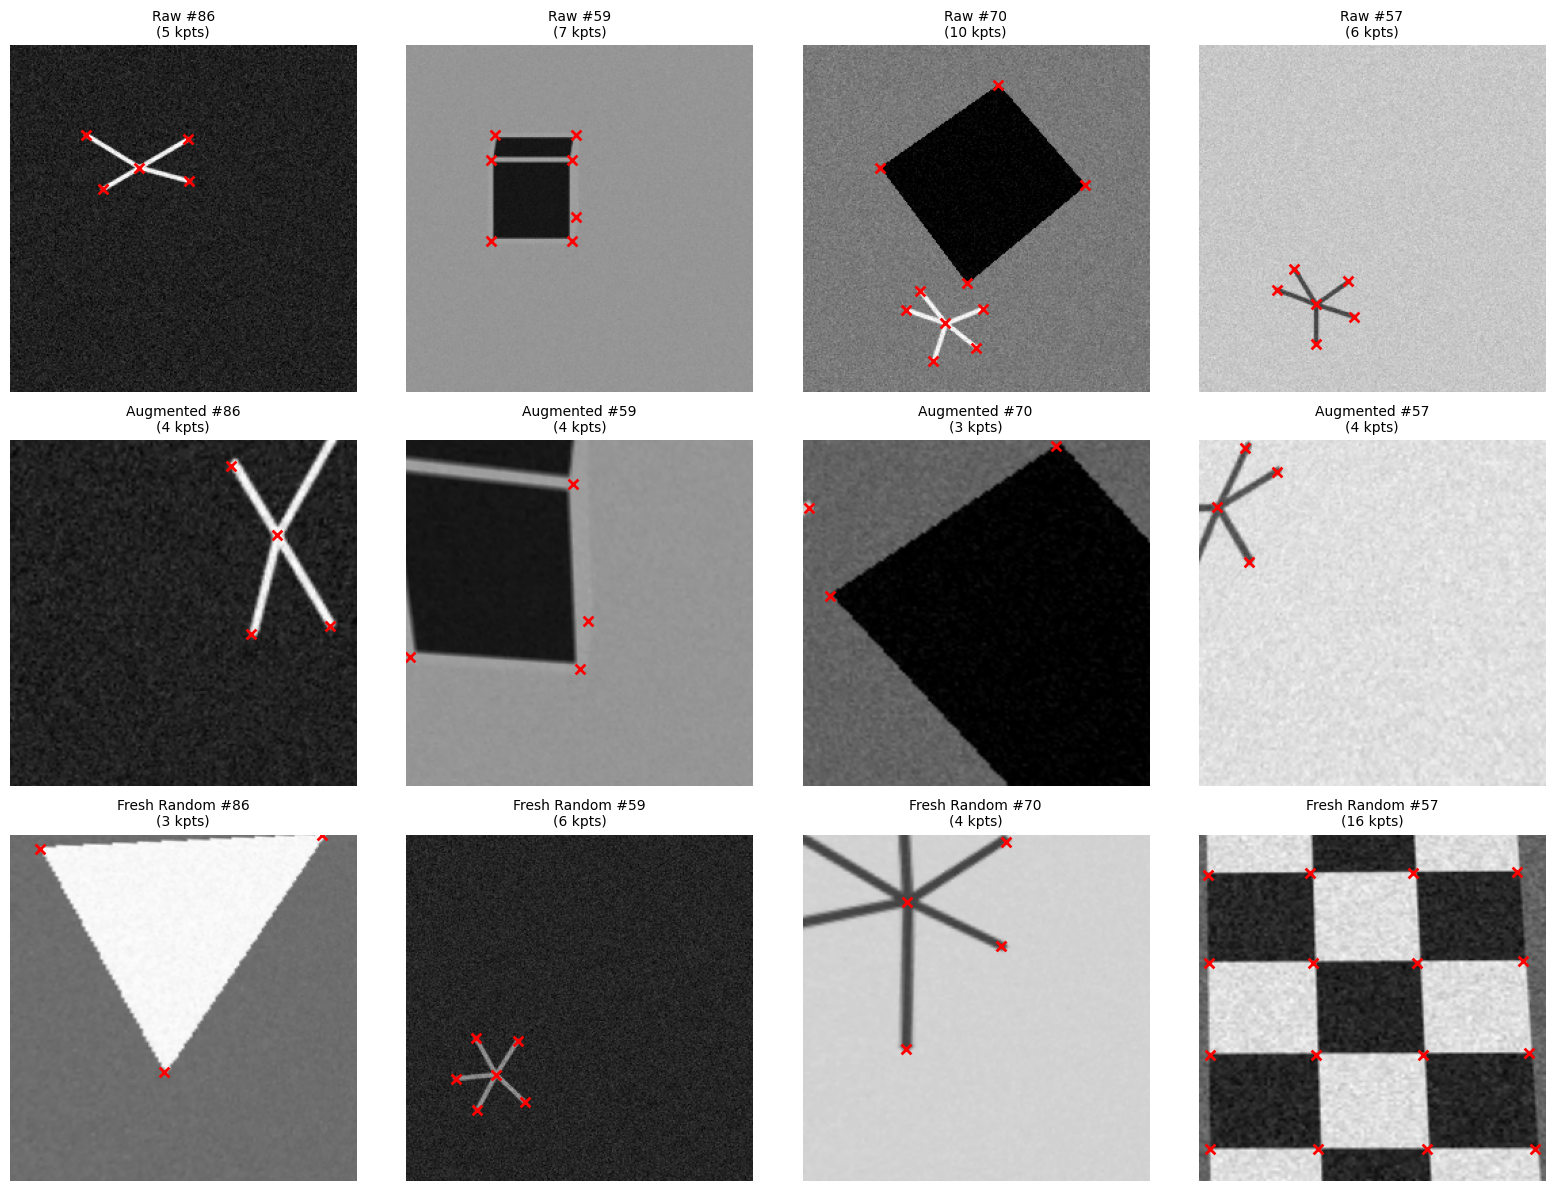

In [7]:
# Select 4 random sample indices
num_samples_to_show = 4
random_indices = random.sample(range(len(dataset_raw.pregenerated_data)), num_samples_to_show)

# Create 3-row plot: raw, augmented from file, fresh random
fig, axes = plt.subplots(3, num_samples_to_show, figsize=(16, 12))

for col, idx in enumerate(random_indices):
    # Row 1: Raw sample (no augmentation)
    img_raw, target_raw = dataset_raw[idx]
    img_raw_np = img_raw.squeeze().numpy()
    raw_kpts = extract_keypoints_from_target(target_raw)

    axes[0, col].imshow(img_raw_np, cmap='gray', vmin=0, vmax=1)
    if len(raw_kpts) > 0:
        axes[0, col].scatter(raw_kpts[:, 0], raw_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[0, col].set_title(f'Raw #{idx}\n({len(raw_kpts)} kpts)', fontsize=10)
    axes[0, col].axis('off')

    # Row 2: Augmented sample (same base image from file)
    img_aug, target_aug = dataset_augmented[idx]
    img_aug_np = img_aug.squeeze().numpy()
    aug_kpts = extract_keypoints_from_target(target_aug)

    axes[1, col].imshow(img_aug_np, cmap='gray', vmin=0, vmax=1)
    if len(aug_kpts) > 0:
        axes[1, col].scatter(aug_kpts[:, 0], aug_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[1, col].set_title(f'Augmented #{idx}\n({len(aug_kpts)} kpts)', fontsize=10)
    axes[1, col].axis('off')

    # Row 3: Fresh random generation (completely new image)
    img_fresh, target_fresh = dataset_fresh[idx]
    img_fresh_np = img_fresh.squeeze().numpy()
    fresh_kpts = extract_keypoints_from_target(target_fresh)

    axes[2, col].imshow(img_fresh_np, cmap='gray', vmin=0, vmax=1)
    if len(fresh_kpts) > 0:
        axes[2, col].scatter(fresh_kpts[:, 0], fresh_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[2, col].set_title(f'Fresh Random #{idx}\n({len(fresh_kpts)} kpts)', fontsize=10)
    axes[2, col].axis('off')

# Row labels
axes[0, 0].set_ylabel('Raw\n(No Augmentation)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Augmented\n(From File)', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Fresh Random\n(Generated)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [8]:
import torch
from Helper import load_checkpoint_generic
from Models import KeypointNet, process_output_torch, detect_local_maxima

✅ Loaded checkpoint: ./checkpoints\checkpoint_epoch_200000.pth (epoch 200000)
✓ Loaded checkpoint (iteration 200,000)


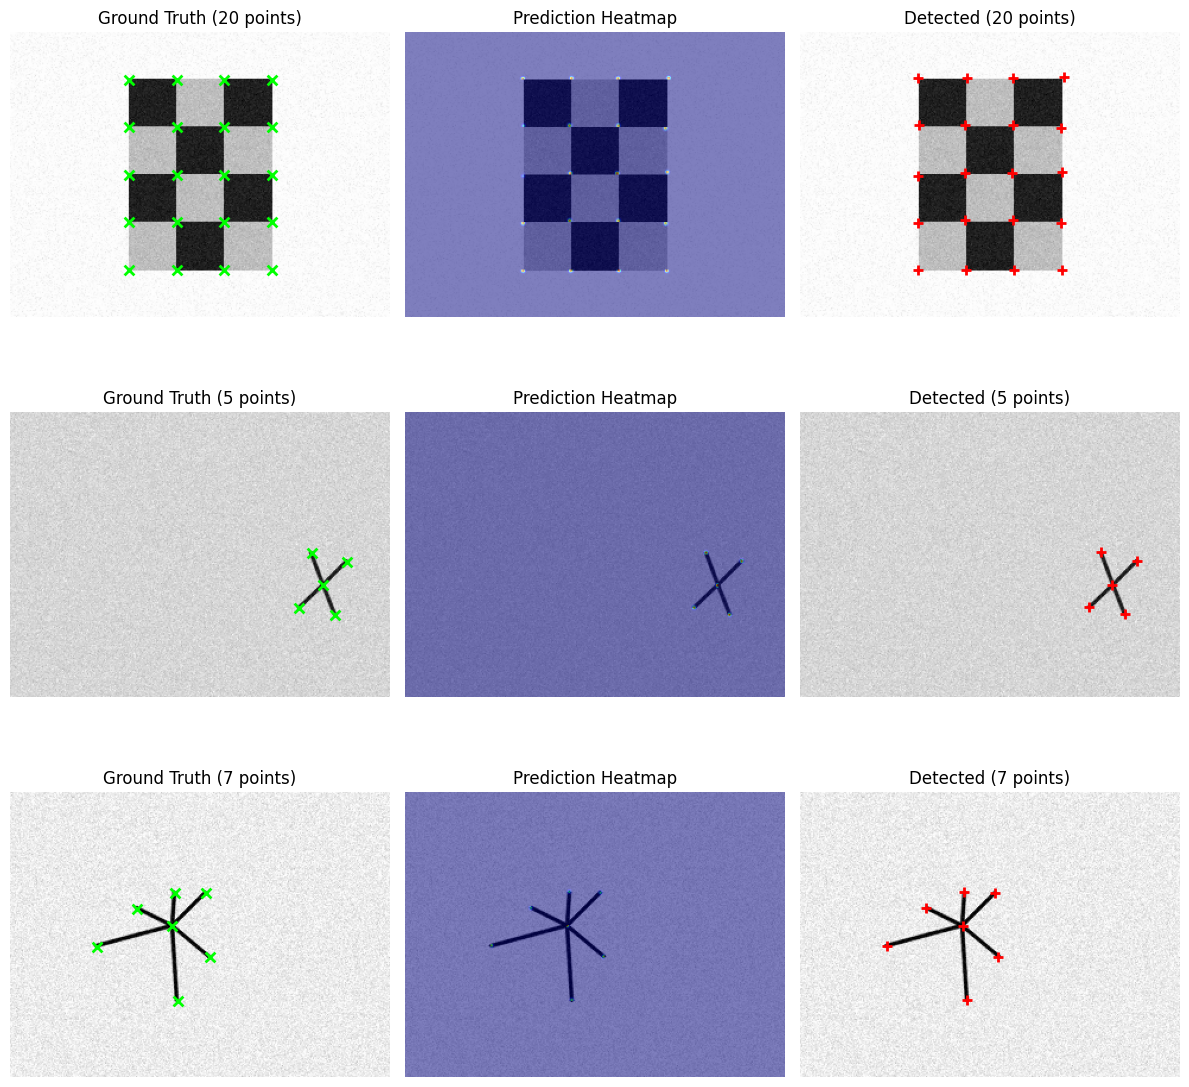

✓ Displayed 3 samples


In [23]:
# ============================================================
# Quick Model Test - On-the-fly Generation
# ============================================================

# Configuration
num_samples = 3
image_size = (240, 320)
checkpoint_dir = './checkpoints'

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KeypointNet().to(device)

# Load checkpoint
checkpoint = load_checkpoint_generic(checkpoint_dir, device)
if checkpoint:
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"✓ Loaded checkpoint (iteration {checkpoint.get('iteration', 'unknown'):,})")
else:
    print("⚠️  No checkpoint found!")

model.eval()

# Generate and visualize samples
fig, axes = plt.subplots(num_samples, 3, figsize=(12, 4 * num_samples))
if num_samples == 1:
    axes = axes.reshape(1, -1)

with torch.no_grad():
    for i in range(num_samples):
        # Generate fresh sample on-the-fly
        img, keypoints = generate_synthetic_image(
            width=image_size[1],
            height=image_size[0],
            grayscale=True,
            use_homography=False
        )

        # Normalize and prepare for model
        img_normalized = img.astype(np.float32) / 255.0
        image_tensor = torch.from_numpy(img_normalized[np.newaxis, np.newaxis, :, :]).to(device)

        # Get prediction
        logits = model(image_tensor, return_logits=True)
        heatmap = model(image_tensor, return_logits=False)

        # Extract predicted keypoints
        heatmap_np = heatmap.squeeze().cpu().numpy()
        pred_kpts = detect_local_maxima(heatmap_np, threshold=0.01)

        # Plot 1: Ground truth
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].scatter(keypoints[:, 0], keypoints[:, 1],
                          c='lime', s=50, marker='x', linewidths=2)
        axes[i, 0].set_title(f'Ground Truth ({len(keypoints)} points)')
        axes[i, 0].axis('off')

        # Plot 2: Heatmap
        axes[i, 1].imshow(img, cmap='gray')
        axes[i, 1].imshow(heatmap_np, cmap='jet', alpha=0.5)
        axes[i, 1].set_title('Prediction Heatmap')
        axes[i, 1].axis('off')

        # Plot 3: Detected keypoints
        axes[i, 2].imshow(img, cmap='gray')
        if len(pred_kpts) > 0:
            axes[i, 2].scatter(pred_kpts[:, 0], pred_kpts[:, 1],
                              c='red', s=50, marker='+', linewidths=2)
        axes[i, 2].set_title(f'Detected ({len(pred_kpts)} points)')
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
print(f"✓ Displayed {num_samples} samples")

Initializing model...
✅ Loaded checkpoint: ./checkpoints\checkpoint_epoch_200000.pth (epoch 200000)
✓ Loaded checkpoint from iteration 200,000

Running homography adaptation...
Original size: 240x320, Padded size: 384x512
Processing original image...
  Processed 20/99 homographies
  Processed 40/99 homographies
  Processed 60/99 homographies
  Processed 80/99 homographies
✓ Detected 11 keypoints after homography adaptation
Detected 11 keypoints


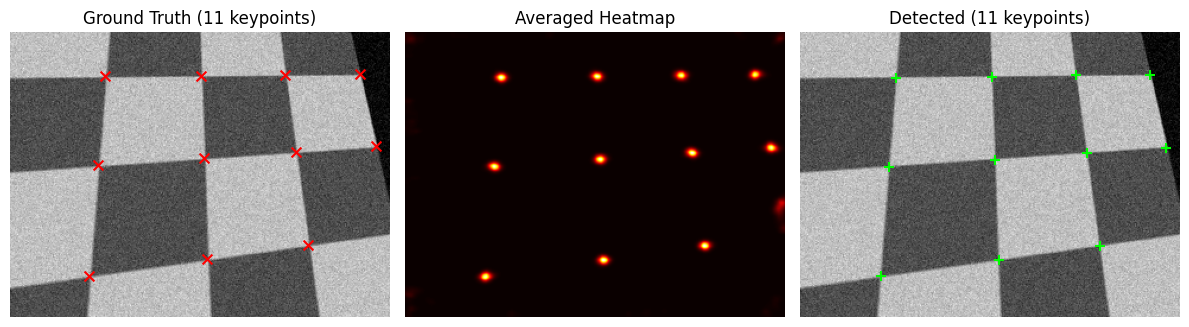

In [25]:
from Models import homography_adaptation

# Load your trained model
# Test configuration
test_checkpoint_dir = './checkpoints'  # Path to checkpoint directory

# Initialize model
print("Initializing model...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KeypointNet().to(device)

# Load latest checkpoint
checkpoint = load_checkpoint_generic(test_checkpoint_dir, device)
if checkpoint:
    model.load_state_dict(checkpoint['model_state_dict'])
    iteration = checkpoint.get('iteration', 'unknown')
    print(f"✓ Loaded checkpoint from iteration {iteration:,}")
else:
    print("⚠️  No checkpoint found! Using untrained model.")

print()

model.eval()

# Load test image
img, true_kpts = generate_synthetic_image(320, 240, grayscale=True, use_homography=True)
img_normalized = img.astype(np.float32) / 255.0
img_tensor = torch.from_numpy(img_normalized[np.newaxis, np.newaxis, :, :]).float().to('cuda')

# Apply homography adaptation
print("Running homography adaptation...")
averaged_heatmap, detected_kpts = homography_adaptation(
    model,
    img_tensor,
    num_iter=99,
    threshold=0.075
)

print(f"Detected {len(detected_kpts)} keypoints")

# Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.scatter(true_kpts[:, 0], true_kpts[:, 1], c='red', s=50, marker='x')
plt.title(f'Ground Truth ({len(true_kpts)} keypoints)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(averaged_heatmap.squeeze().cpu().numpy(), cmap='hot')
plt.title('Averaged Heatmap')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.scatter(detected_kpts[:, 0], detected_kpts[:, 1], c='lime', s=50, marker='+')
plt.title(f'Detected ({len(detected_kpts)} keypoints)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
def test_extract_keypoints_from_target():
    from Models import extract_keypoints_from_target, prepare_training_target_basic

    # Generate sample and visualize target
    img, kpts = generate_synthetic_image(256, 256, grayscale=True)
    target = prepare_training_target_basic([kpts], (256, 256))

    # Check target statistics
    print(f"Keypoints generated: {len(kpts)}")
    print(f"Active cells in target: {(target[0, :64].sum(dim=0) > 0).sum()}")
    print(f"No-point cells: {(target[0, 64] > 0).sum()}")

    # Extract keypoints from target
    extracted = extract_keypoints_from_target(target[0])
    print(f"Keypoints extracted: {len(extracted)}")

test_extract_keypoints_from_target()

Keypoints generated: 16
Active cells in target: 16
No-point cells: 1008
Keypoints extracted: 16


## System Architecture

```
┌─────────────────────────────────────────────────────────────────┐
│                        TRAINING PIPELINE                         │
└─────────────────────────────────────────────────────────────────┘

┌──────────────────┐
│  Generator.py    │
│  Synthetic Data  │
└────────┬─────────┘
         │
         │ Generates random shapes (triangles, quads, stars,
         │ checkerboards, cubes) with known keypoint positions
         ▼
┌──────────────────────────────────────┐
│  Image (256x256)     Keypoints       │
│  ┌────────────┐      [(x1,y1),       │
│  │  ▲    ╱╲   │       (x2,y2),       │
│  │ ╱ ╲  ╱  ╲  │       (x3,y3), ...]  │
│  │╱   ╲╱    ╲ │                       │
│  └────────────┘                       │
└──────────────┬───────────────────────┘
               │
               │ Apply augmentations:
               │ - Random homography (perspective transform)
               │ - Photometric changes (brightness/contrast)
               │ - Gaussian noise
               ▼
┌─────────────────────────────────────┐
│  Models.py: KeypointDataset         │
│  Converts keypoints to target       │
│  tensor (65 channels, 32x32)        │
└──────────────┬──────────────────────┘
               │
               ▼
┌─────────────────────────────────────────────────────┐
│  Models.py: KeypointNet (Neural Network)            │
│                                                      │
│  INPUT: Grayscale image (1, 256, 256)               │
│     ↓                                                │
│  ┌──────────────────────────────────────┐           │
│  │  Encoder (ResNet blocks)             │           │
│  │  - Layer 1: 1→64 channels + pool     │           │
│  │  - Layer 2: 64→64 channels + pool    │           │
│  │  - Layer 3: 64→128 channels + pool   │           │
│  │  - Layer 4: 128→128 channels         │           │
│  └──────────────────────────────────────┘           │
│     ↓ Feature map: (128, 32, 32)                    │
│  ┌──────────────────────────────────────┐           │
│  │  Decoder                             │           │
│  │  - Conv: 128→256 channels            │           │
│  │  - Conv: 256→65 channels             │           │
│  └──────────────────────────────────────┘           │
│     ↓                                                │
│  OUTPUT: Logits (65, 32, 32)                        │
│                                                      │
│  65 channels = 64 spatial bins + 1 "no point" class │
└─────────────────────────────────────────────────────┘
               │
               │ Loss: Cross-entropy
               │ Optimizer: Adam
               ▼
┌──────────────────────────────┐
│  Trained Model Checkpoint    │
└──────────────────────────────┘


┌─────────────────────────────────────────────────────────────────┐
│                      INFERENCE PIPELINE                          │
└─────────────────────────────────────────────────────────────────┘

┌──────────────────┐
│  Input Image     │
│  (256x256)       │
└────────┬─────────┘
         │
         ▼
┌─────────────────────────────────────────────────────────┐
│  Homography Adaptation (Optional, for better accuracy)  │
│                                                          │
│  1. Pad image by 30% on all sides                       │
│  2. Generate 99 random homographies                     │
│  3. For each homography:                                │
│     - Warp padded image                                 │
│     - Crop to center (original size)                    │
│     - Get heatmap from network                          │
│     - Pad heatmap                                       │
│     - Inverse warp back                                 │
│     - Crop to center                                    │
│  4. Average all heatmaps                                │
└─────────────────────────────┬───────────────────────────┘
                              │
                              ▼
┌─────────────────────────────────────────────────────────┐
│  KeypointNet.forward(return_logits=False)               │
│                                                          │
│  Logits (65, 32, 32)                                    │
│     ↓ Softmax over 65 channels                          │
│  Probabilities (65, 32, 32)                             │
│     ↓ Remove "no point" channel                         │
│  (64, 32, 32)                                           │
│     ↓ Pixel Shuffle (depth_to_space 8x8)                │
│  Heatmap (1, 256, 256)                                  │
└─────────────────────────────┬───────────────────────────┘
                              │
                              ▼
┌──────────────────────────────────────────────────────────┐
│  detect_local_maxima()                                   │
│                                                          │
│  1. Find peaks using maximum filter (NMS)               │
│  2. Refine each peak with weighted averaging            │
│     in local neighborhood                               │
└─────────────────────────────┬────────────────────────────┘
                              │
                              ▼
┌──────────────────────────────────────┐
│  Detected Keypoints                  │
│  [(x1, y1), (x2, y2), ...]           │
└──────────────────────────────────────┘
```

# Deep Dive: Data Generation, Training & Inference

## Data Generation Process

### Shape Generation Philosophy

Each shape type follows a similar pattern but with unique geometric rules:

**Triangle Generation**
- Starts by picking a random center point within safe margins from image edges
- Creates three vertices by placing points around the center at roughly 120-degree intervals
- Adds random jitter to angles (±15 degrees) so triangles aren't perfectly regular
- Random radius determines size, ensuring vertices stay within image bounds
- The three corner points become the keypoints we want the network to learn

**Quadrilateral Generation**
- Similar center-based approach but with four points at 90-degree intervals
- Can be configured as squares (equal sides) or rectangles (different width/height)
- Random rotation applied to the entire shape for variety
- Corner jitter makes shapes look more natural and less synthetic
- All four corners are marked as keypoints

**Star Generation**
- Most complex simple shape - has a center point plus N outer points
- Center is one keypoint, each tip of the star is another keypoint
- Points alternate between two radii (inner and outer) creating the star effect
- Number of points typically ranges from 4 to 8
- Random rotation prevents the network from memorizing fixed orientations

**Checkerboard Generation**
- Creates a grid pattern with alternating colors
- Keypoints are placed at every grid intersection point
- For a 5×5 checkerboard, you get 6×6 = 36 keypoints (edges of squares)
- Grid spacing is randomized to create variety in scale
- Most keypoint-dense pattern, good for testing detector capacity

**Cube Generation**
- Simulates a 3D cube by drawing two overlapping squares
- Front face square gives 4 keypoints
- Back face (smaller, offset) gives up to 4 more visible corner keypoints
- Creates depth illusion while maintaining 2D keypoint detection
- Teaches network about occlusion and layering

### Color Assignment Strategy

The color system ensures shapes are always visible against their background:

- When generating a shape, first decide if the image should be grayscale or color
- Pick a random background color
- For the shape, pick a color that differs by at least 50 intensity units from background
- This minimum difference guarantees visual contrast
- In grayscale mode, this becomes a brightness difference
- Prevents situations where shapes blend into background

### Augmentation Pipeline

**Homography Augmentation**

This is the most important augmentation for keypoint detection:

- Generates a random 3×3 transformation matrix representing perspective change
- Simulates what happens when you view a planar surface from different angles
- Can include rotation, scaling, shear, and perspective distortion
- Applied to both the image AND the keypoint coordinates (they move together)
- The transformation is invertible, so we can always map keypoints back
- Makes the network viewpoint-invariant - crucial for real-world use

**Photometric Augmentation**

Simple but effective brightness variation:

- Multiplies pixel intensities by a random factor between 0.7 and 1.3
- Simulates different lighting conditions (darker or brighter)
- Applied uniformly across entire image
- Prevents network from relying on absolute brightness values
- Forces learning of shape structure rather than intensity patterns

**Gaussian Noise Addition**

Adds realistic camera sensor noise:

- Random noise sampled from Gaussian distribution
- Standard deviation randomly chosen between 0.01 and 0.05
- Mimics real-world image imperfections
- Prevents overfitting to perfectly clean synthetic images
- Network learns to be robust to measurement uncertainty

## Training Process Detailed

### Target Encoding for 320×240 Image

Let's walk through how a keypoint at position (160, 120) gets encoded:

**Step 1: Grid Cell Assignment**

The 320×240 image is divided into an 8×8 grid of cells, creating a 40×30 grid structure:
- Grid width: 320 ÷ 8 = 40 cells
- Grid height: 240 ÷ 8 = 30 cells
- Each cell represents an 8×8 pixel region

For keypoint at (160, 120):
- Cell X-coordinate: 160 ÷ 8 = 20
- Cell Y-coordinate: 120 ÷ 8 = 15
- This keypoint belongs to grid cell (20, 15)

**Step 2: Sub-Cell Position**

Within that cell, find the exact 8×8 position:
- Sub-pixel X: 160 mod 8 = 0 (leftmost position in cell)
- Sub-pixel Y: 120 mod 8 = 0 (topmost position in cell)
- This identifies which of the 64 possible positions within the cell

**Step 3: Channel Index Calculation**

The 8×8 positions map to 64 channels (0-63):
- Channel index = sub_y × 8 + sub_x
- For our example: 1 × 8 + 6 = channel 14

**Step 4: Gaussian Distribution Creation**

Instead of a hard 1 at that position, create a soft Gaussian blob:
- Center the Gaussian at (sub_x, sub_y) = (0, 0)
- Use sigma = 1.0 for smoothness
- Create an 8×8 grid of values showing probability falloff
- This makes learning easier - nearby positions also get some activation
- Flattened into a 64-dimensional vector

**Step 5: Target Tensor Assembly**

The final training target is a (65, 30, 40) tensor:
- First 64 channels: Represent the 64 possible sub-pixel positions
- Channel 65: "No keypoint here" - filled with high values for empty cells
- At cell (20, 15): Place the 64-D Gaussian vector in channels 0-63
- At all other cells: Set channel 64 to high value

This creates a sparse tensor where most cells say "no keypoint" and a few cells have detailed position information.

**Why This Approach?**

The cell-based encoding solves several problems:
- Reduces spatial resolution (40×30 vs 320×240) for computational efficiency
- Still maintains good precision (up to 1/8 pixel accuracy within cells)
- Treats detection as classification problem (64+1 classes per cell)
- Multiple keypoints naturally handled (different cells)
- Differentiable for gradient-based learning

```
Image (320×240)                 Grid (30×40)                     Per-cell 8×8 encoding
┌─────────────────────┐        ┌───┬───┬───┬───┬───┬───┐        ┌───┬───┬───┬───┬───┐
│                     │        │  0│  1│  2│  3│  4│  5│ ...    │  0│  1│  2│  3│  4│
│           ●         │        ├───┼───┼───┼───┼───┼───┤        ├───┼───┼───┼───┼───┤
│                     │   →    │ 40│ 41│ 42│●43│ 44│ 45│ ... →  │  8│  9│ 10│ 11│ 12│
│                     │        ├───┼───┼───┼───┼───┼───┤        ├───┼───┼───┼───┼───┤
│                     │        │ 80│ 81│ 82│ 83│ 84│ 85│ ...    │ 16│ 17│ 18│●19│ 20│
└─────────────────────┘        └───┴───┴───┴───┴───┴───┘        └───┴───┴───┴───┴───┘
                                ... ... ... ... ... ...        (8×8 cell → 64 channels)
```

### Loss Function Mechanics

**Cross-Entropy Over Spatial Cells**

The loss function treats each grid cell independently as a 65-class classification problem.

For the 320×240 example with a 40×30 grid:
- We have 40 × 30 = 1,200 independent classification problems to solve
- Each cell must choose one of 65 classes representing its content
- Classes 0-63: "Keypoint at this specific sub-pixel position"
- Class 64: "No keypoint present in this cell"

**Computation Steps:**

Starting with model output logits of shape (Batch, 65, 30, 40):

1. **Reshape for Classification:**
   - Rearrange dimensions to (Batch, 30, 40, 65) via permute operation
   - Flatten spatial dimensions: (Batch × 1,200, 65) - one row per grid cell
   - Each of the 1,200 rows represents a 65-way classification decision

2. **Prepare Ground Truth Labels:**
   - Target tensor starts in (65, 30, 40) format
   - Take argmax over the first dimension (65 channels) to get class labels
   - Result is (30, 40) grid where each cell contains its class index (0-64)
   - Flatten to (Batch × 1,200) class indices - one label per cell

3. **Compute Loss Per Cell:**

   For each cell *i* at position (row, col):

   ```
   Loss_i = -log(softmax(logits_i)[target_class_i])
   ```

   Where:
   - `logits_i` is the 65-dimensional vector of raw scores for cell *i*
   - `target_class_i` is the ground truth class (0-64) for that cell
   - Softmax converts logits to probabilities that sum to 1.0
   - Negative log-likelihood penalizes wrong predictions

4. **Average Over All Cells:**

   ```
   Total_Loss = (1/1200) × Σ Loss_i
   ```

   The final loss is the mean of all 1,200 cell losses, providing a single scalar value for backpropagation.

**Why Cross-Entropy?**

This formulation transforms keypoint detection into a dense classification task:

- **Per-Cell Decision:** Each grid cell independently votes for its contents
- **Probabilistic Output:** Softmax produces calibrated confidence scores
- **Sharp Predictions:** Loss encourages the model to be confident (high probability on correct class)
- **Class Imbalance Handling:** Naturally handles the fact that most cells are "no keypoint"
- **Proven Architecture:** This approach mirrors SuperPoint's successful design
- **Gradient Flow:** Cross-entropy provides strong gradients even for small errors


## Inference Process Detailed

### Model Output Interpretation

**Raw Output: Logits Tensor**

When you call the model during training (return_logits=True):
- Shape: (Batch, 65, 30, 40) for our 320×240 example
- These are raw unnormalized scores (logits)
- Each of 1200 cells has 65 values competing
- Higher value = more confident in that class

**Conversion to Heatmap**

During inference (return_logits=False), the model performs several transformations:

**Step 1: Softmax Over Channels**
- Apply softmax to the 65 channels at each spatial location
- Now each cell has 65 probability values that sum to 1.0
- Shape still (Batch, 65, 30, 40) but now normalized

**Step 2: Remove "No Keypoint" Channel**
- Discard channel 64 (the "no keypoint" class)
- Keep only channels 0-63 (the actual position probabilities)
- Shape becomes (Batch, 64, 30, 40)

**Step 3: Pixel Shuffle (Depth-to-Space)**

This is converting channel depth back to spatial resolution:

For our 320×240 example:
- Input: (1, 64, 30, 40) tensor
- Interprets 64 channels as an 8×8 grid per cell
- Rearranges data: Each 8×8 block of channels becomes 8×8 spatial pixels
- Output: (1, 1, 240, 320) - full resolution heatmap!

The pixel shuffle operation:
- Takes the 64 probabilities in each cell
- Arranges them into an 8×8 spatial grid
- Stitches all cells together
- Result is a continuous probability map over the entire image

**Step 4: Heatmap Properties**

The final heatmap:
- Values range 0 to 1 (probabilities)
- High values indicate likely keypoint locations
- Peak brightness corresponds to keypoint confidence
- Smooth gradients around keypoints due to Gaussian encoding

### Keypoint Extraction from Heatmap

**Non-Maximum Suppression**

First stage finds local peaks:
- Apply maximum filter with kernel size 9×9
- This slides a window, keeping only maximum value
- Compare original heatmap to max-filtered version
- Where they match AND value exceeds threshold: that's a peak
- Eliminates close duplicate detections

**Sub-Pixel Refinement**

Second stage improves precision:
- For each detected peak, extract local neighborhood (e.g., 7×7 window)
- Compute weighted average of coordinates using heatmap values as weights
- X_refined = Σ(x × heatmap[x,y]) / Σ(heatmap[x,y])
- Y_refined = Σ(y × heatmap[x,y]) / Σ(heatmap[x,y])
- This shifts the keypoint to the center of mass of the activation

Result: Sub-pixel accurate keypoint positions

### Homography Adaptation (Inference Enhancement)

This technique dramatically improves keypoint repeatability:

**The Process:**

Generate 100 random homographies (including identity transformation)

For each homography H:
1. Pad the input image by 30% on all sides using replication
2. Apply homography H to warp the padded image
3. Crop the warped result back to original size (320×240)
4. Run this through the neural network to get a heatmap
5. Pad the output heatmap by 30% (same ratio as input)
6. Apply inverse homography H⁻¹ to unwarp the padded heatmap
7. Crop the unwarped heatmap to original size

Average all 100 heatmaps element-wise

**Why It Works:**

Each homography tests the image from a slightly different perspective - the network sees the same scene from 100 different angles. True keypoints appear consistently across views while false positives are random and get averaged out. The padding ensures warped images don't have black borders that could confuse the network. Inverse warping brings all detections back to a common coordinate frame for meaningful averaging.

**The Cost:**

Inference is 100× slower than single-shot detection because you're running the network 100 times. However, the quality improvement is substantial - repeatability increases significantly. This is why it's optional and primarily used during evaluation or when quality matters more than speed.

**Implementation Detail:**

The padding ratio (30%) is chosen to ensure that even aggressive perspective transforms don't clip important image content. The replicate padding mode extends border pixels outward, creating natural-looking boundaries rather than black bars.